In [5]:
# Load some libraries for reading the data from the database and plotting 

import django
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.tasks import *

from django.db.models import Count, Sum

p = Project.objects.get(pk=147)
qid = 6299


In [6]:
# Define some snappy names that will fit on the plots
# TODO: Someone should choose these carefully
short_name_dict = {
    "Sufficiency and distributional analyses in the demand side of climate change mitigation":"Sufficiency",
    "Determinants of low-carbon transport mode adoption: Systematic review of reviews": "Transport",
    "Status consciousness in energy consumption decisions: A systematic review of literature": "Status",
    "Exploring SDG links of dietary choice and food waste related mitigation solutions-II": "SDG Diets II",
    "Well-being/demand side search query": "Well-being",
    "Well-being, demand side search query": "Well-being",
    "Systematic Review of Case Studies on Demand Side Climate Mitigation Actions through Local Urban Governance in Developing Countries":"Urban Governance",
    "Shared Mobility: A Systematic Review of its Impacts": "Shared Mobility",
    "Working time reduction in climate change mitigation (same paper, diff query)":"Working Time",
    "Working time reduction in climate change mitigation": "Working Time II",
    "Integrating Indigenous Knowledge Systems into climate change adaptation strategies for sustainable development": "Indigenous Knowledge",
    "Dematerialisation and sharing of goods: a systematic review of the determinants and magnitude of the indirect impacts on energy consumption":"Dematerialising & Sharing",
    "Mitigating climate change in food consumption and food waste: A systematic map of behavioural interventions": "Food Behaviour",
    "Disruptive consumer innovations for climate change": "Disruptive Innovations",
    "Exploring SDG links of dietary choice and food waste related mitigation solutions": "SDG Diets",
    "A literature survey on demand-side solutions for climate-change mitigation": "Literature Survey",
    "A literature survey on demand-side solutions for climate-change mitigation (2)": "Literature Survey (2)",
    "Urban energy demand in global south cities": "Global South Cities",
    "A Systematic Review for The Equity of Health Burdens Caused by Climate Change": "Health Equity",
    "Drivers for Behavioural Change": "Behavioural Drivers",
    "The potential for teleworking": "Teleworking",
    "Acceptability for climate solution": "Acceptability",
    "Quantifying the potential for climate change mitigation of consumption-based options": "Quantifying potential",
    "A global map of demand typologies for a low-carbon building sec": "Building Demand Typologies",
    "Bottom-up drivers of household energy behavior changes": "Bottom-up drivers",
    "Bottom-up drivers of household energy behavior changes (2)": "Bottom-up drivers (2)",
}

<QuerySet [{'title': 'Shared Mobility: A Systematic Review of its Impacts'}, {'title': 'Systematic Review of Case Studies on Demand Side Climate Mitigation Actions through Local Urban Governance in Developing Countries'}, {'title': 'Well-being, demand side search query'}, {'title': 'Bottom-up drivers of household energy behavior changes (2)'}, {'title': 'Acceptability for climate solution'}, {'title': 'Mitigating climate change in food consumption and food waste: A systematic map of behavioural interventions'}, {'title': 'Integrating Indigenous Knowledge Systems into climate change adaptation strategies for sustainable development'}, {'title': 'Bottom-up drivers of household energy behavior changes'}, {'title': 'A global map of demand typologies for a low-carbon building sec'}, {'title': 'Exploring SDG links of dietary choice and food waste related mitigation solutions'}, {'title': 'A literature survey on demand-side solutions for climate-change mitigation (2)'}, {'title': 'Status cons

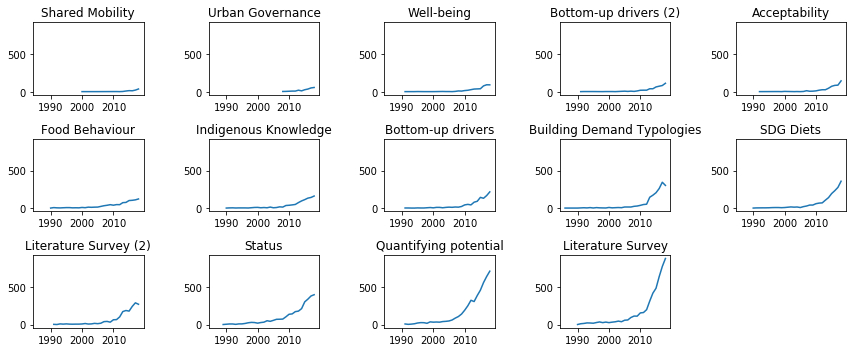

In [12]:
fig = plt.figure(figsize=(12,8))

qs = Query.objects.filter(
    project=p,
    creator__username="java"
).exclude(
    pk__in=[6262,6265,6256,6263,6260,6303,6299,6270,7924,7923,7922]
).order_by('r_count')

print(qs.values('title'))

for i, q in enumerate(qs):
    print(q)
    if i > 0:
        ax = fig.add_subplot(5,5,i+1,sharey=ax,sharex=ax)
    else:
        ax = fig.add_subplot(5,5,i+1)
    qdocs = q.doc_set.filter(
        PY__lt=2019
    ).values('PY').annotate(
        n = Count('pk')
    ).order_by('PY')
    df = pd.DataFrame.from_dict(list(qdocs))
    try:
        ax.plot(df['PY'],df['n'])
        ax.set_title(short_name_dict[q.title])
    except:
        print(df)
        print(q.id)
    
fname = "plots/bibliometrics/reviews_PY"
plt.savefig(f"{fname}.png")
plt.savefig(
    f"{fname}.svg",
    bbox_inches="tight"
)
    
fig.tight_layout()

Query A_renew
Query B_renew
Query C_renew
Query D_renew
Query E_renew
Query F_renew
Query G_renew
Query H_renew
Query I_renew
Query J_renew
Query K_renew
Query L_renew
Query M_renew
Query N_renew


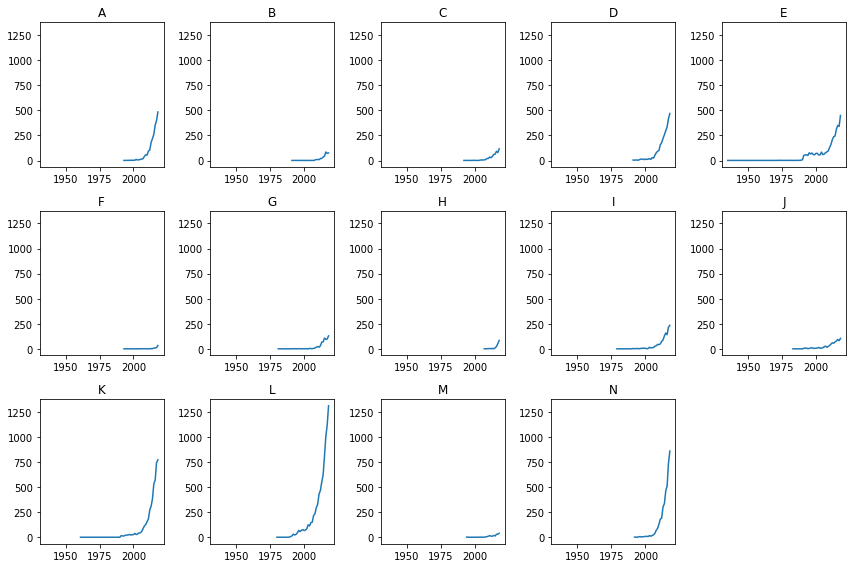

In [10]:
p2 = Project.objects.get(pk=148)


fig = plt.figure(figsize=(12,8))

for i, q in enumerate(p2.query_set.filter(database="WoS").order_by('title')):
    print(q)
    if i > 0:
        ax = fig.add_subplot(3,5,i+1,sharey=ax,sharex=ax)
    else:
        ax = fig.add_subplot(3,5,i+1)
    qdocs = q.doc_set.filter(
        PY__lt=2019
    ).values('PY').annotate(
        n = Count('pk')
    ).order_by('PY')
    df = pd.DataFrame.from_dict(list(qdocs))
    ax.plot(df['PY'],df['n'])
    ax.set_title(q.title.replace('query ','').replace('Query ','')[:1])

    
fig.tight_layout()

fname = "plots/bibliometrics/chapters_PY"
plt.savefig(f"{fname}.png")
plt.savefig(
    f"{fname}.svg",
    bbox_inches="tight"
)

plt.show()

x1
x11
x12
x13
x2
x3
x4
x5
x6
x7
x8
x9


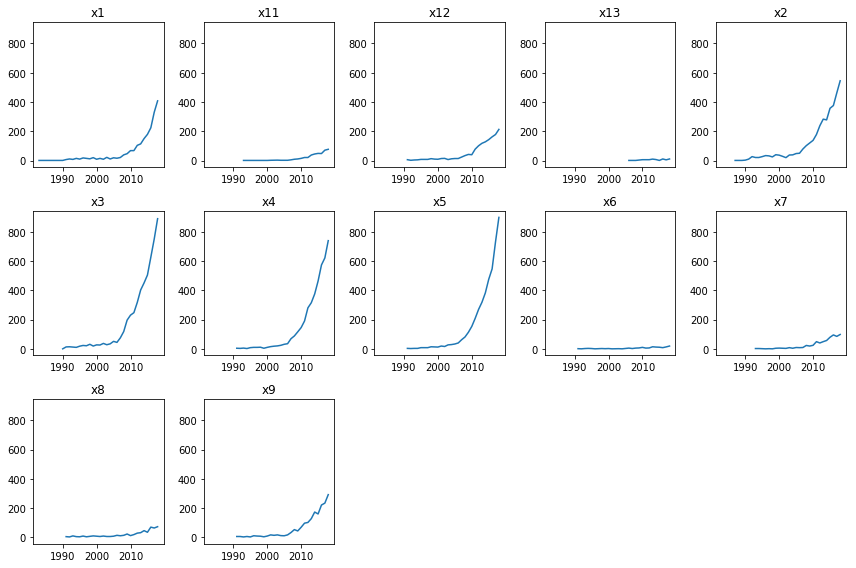

In [11]:
p3 = Project.objects.get(pk=210)


fig = plt.figure(figsize=(12,8))

for i, q in enumerate(p3.query_set.filter(database="WoS").order_by('title')):
    q.title = q.title.replace("Query ","")
    q.save()
    print(q)
    if i > 0:
        ax = fig.add_subplot(3,5,i+1,sharey=ax,sharex=ax)
    else:
        ax = fig.add_subplot(3,5,i+1)
    qdocs = q.doc_set.filter(
        PY__lt=2019
    ).values('PY').annotate(
        n = Count('pk')
    ).order_by('PY')
    df = pd.DataFrame.from_dict(list(qdocs))
    ax.plot(df['PY'],df['n'])
    ax.set_title(q.title)

    
fig.tight_layout()

fname = "plots/bibliometrics/chapters_PY"
plt.savefig(f"{fname}.png")
plt.savefig(
    f"{fname}.svg",
    bbox_inches="tight"
)

plt.show()